In [1]:
# Data preprocessing
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
diabetes = load_diabetes()

features = diabetes.feature_names
print("Feature Names: ",diabetes.feature_names, '\n')
#print(diabetes.DESCR)

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target)
print(X.head(), '\n\n', y.head())

print("\nData Shape: ", X.shape, y.shape)
print("\nData types: \n", X.dtypes, '\n\n\n',y.dtypes )

Feature Names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641   

        0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0

Data Shape:  (442, 10) (442, 1)

Data types: 
 age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: o

In [2]:
# printting the number of unique values of each
print("\nName of the feature and their unique values:")
for i in diabetes.feature_names:
    #pd.unique(X[i])
    print([i], X[i].nunique())


# missing values
missing_values = X.isnull().sum(axis=0)
print("\nMissing values for input data set: \n",missing_values)

# missing values in the target dataset
missing_values = y.isnull().sum(axis=0)
print("\nMissing values for target data set\n",missing_values)


Name of the feature and their unique values:
['age'] 58
['sex'] 2
['bmi'] 163
['bp'] 100
['s1'] 141
['s2'] 302
['s3'] 63
['s4'] 66
['s5'] 184
['s6'] 56

Missing values for input data set: 
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values for target data set
 0    0
dtype: int64


In [3]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(353, 10) (353, 1) (89, 10) (89, 1)


In [4]:
class Linear_regression:
    def __init__(self, learning_rate=0.001, n_iter=750, bias=True):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.bias = bias
        self.weights = None
        self.losses = []

    def fit(self, X, y):
        if self.bias:
            # Add a column of ones for the bias term
            ones = np.ones((X.shape[0], 1))
            X = np.append(ones, X, axis=1)  # Append a column of ones to X

        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))

        for i in range(self.n_iter):
            y_pred = np.dot(X, self.weights)
            gradient = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            self.weights -= gradient * self.learning_rate
            mse_loss = np.mean((y_pred - y) ** 2, axis=0)
            self.losses.append(mse_loss)

    def predict(self, X):
        if self.bias:
            ones = np.ones((X.shape[0], 1))
            X = np.append(ones, X, axis=1)  # Append a column of ones to X
        return np.dot(X, self.weights)


In [5]:
# applying the class to the two model, one with bias and one without bias
model1 = Linear_regression(bias=True, learning_rate = 0.5, n_iter = 750)
model1.fit(x_train,y_train)
print("Model1 weights (with bias): \n", model1.weights)
print("Model1 losses (with bias):\n", [model1.losses[i] for i in range(5)])
#print("Model1 losses (with bias):\n", model1.losses)
#print("Predictions: \n", model1.predict(x_train))
print("Predictions: \n", [model1.losses[i] for i in range(5)])

Model1 weights (with bias): 
 [[ 152.03069133]
 [  27.93376452]
 [-154.35674642]
 [ 446.65810027]
 [ 287.15065237]
 [ -24.21178495]
 [ -81.72069566]
 [-209.43762743]
 [ 146.40390536]
 [ 363.10313137]
 [ 108.47049999]]
Model1 losses (with bias):
 [0    29229.688385
dtype: float64, 0    5803.447841
dtype: float64, 0    5764.903284
dtype: float64, 0    5726.993858
dtype: float64, 0    5689.708322
dtype: float64]
Predictions: 
 [0    29229.688385
dtype: float64, 0    5803.447841
dtype: float64, 0    5764.903284
dtype: float64, 0    5726.993858
dtype: float64, 0    5689.708322
dtype: float64]


Empirical loss as a function of iterations: 



Text(0, 0.5, 'Predictions')

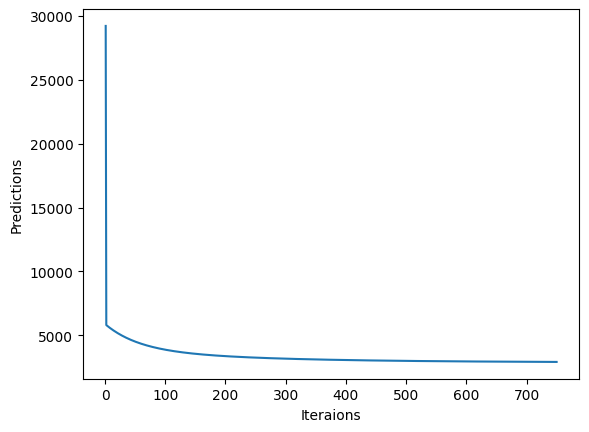

In [6]:
# plotting empirical loss as a function of iterations
print("Empirical loss as a function of iterations: \n")
plt.plot(range(1, len(model1.losses) + 1), model1.losses)
plt.xlabel("Iteraions")
plt.ylabel("Predictions")

In [7]:
# calculating the R2 score using the custom function
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
def my_r2_score(y_test, y_pred):
    mean_true = np.mean(y_test)
    residual = np.sum((y_test - y_pred) ** 2)
    total_variance = np.sum((y_test - mean_true) ** 2)
    return (1 - (residual/total_variance))

print("R2 score using the custom made function: ",my_r2_score(y_test, model1.predict(x_test)))

R2 score using the custom made function:  0    0.512226
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


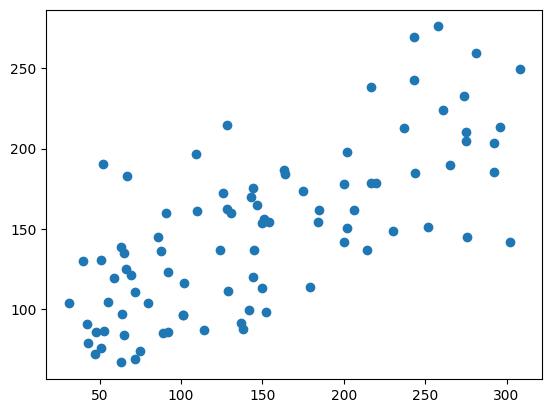

In [8]:
# plot actual vs predicted values - my model on test data
plt.scatter(y_test,model1.predict(x_test))

MSE: 2911.811886119178
R2 score:  0.5341988244945841


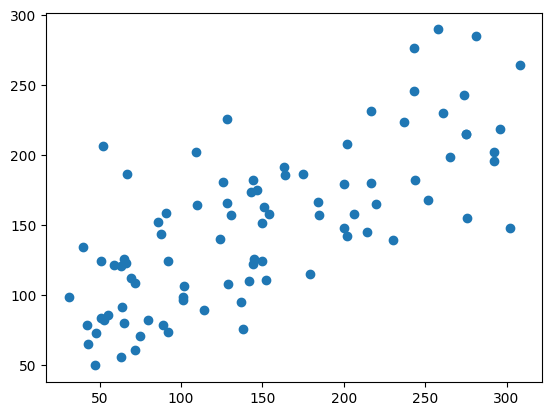

In [9]:
# applying the built-in linear algebra class
lr_skmodel = linear_model.LinearRegression()
lr_skmodel.fit(x_train,y_train)
y_pred = lr_skmodel.predict(x_test)
print('MSE:',mean_squared_error(y_pred,y_test))
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)
# plot actual vs predicted values-built in
plt.scatter(y_test,y_pred)

In [10]:
# linear regression direct solution
weights = np.linalg.solve(np.dot(x_train.T, x_train), np.dot(x_train.T, y_train))
y_pred_direct = np.dot(x_test, weights)

# evaluate performance using scikit-learn's r2_score
r2_direct = r2_score(y_test, y_pred_direct)
print('R2 score using direct solution:', r2_direct)


R2 score using direct solution: -3.245396805111902


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# fit a linear regression model


# train data
degrees = [2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
  poly_reg = PolynomialFeatures(degree=degree)
  X_poly_train = poly_reg.fit_transform(x_train)
  lin_reg_model = LinearRegression()
  lin_reg_model.fit(X_poly_train, y_train)
  y_pred_poly = lin_reg_model.predict(X_poly_train)
  #calculating the R2 score for the current model
  r2 = r2_score(y_train, y_pred_poly)
  print(f"Polynomial model degree {degree}      R2 score:{r2}")


Polynomial model degree 2      R2 score:0.6160179375256238
Polynomial model degree 3      R2 score:0.28504644928138667
Polynomial model degree 4      R2 score:1.0
Polynomial model degree 5      R2 score:1.0
Polynomial model degree 6      R2 score:1.0
Polynomial model degree 7      R2 score:1.0
Polynomial model degree 8      R2 score:1.0
Polynomial model degree 9      R2 score:1.0
